<a href="https://colab.research.google.com/github/Adivah12/Machine-Learning/blob/main/MobileNetV2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARY

In [ ]:
from google.colab import files    # Untuk upload files
import zipfile                    # Untuk unzip file
import os                         # Untuk interaksi dengan os
import shutil                     # Untuk interaksi dengan os
import random                     # Untuk random
import matplotlib.pyplot as plt   # Untuk visualisasi data
import matplotlib.image as mpimg  # Membaca dan memanipulasi gambar
import tensorflow as tf           # Library utama untuk Machine learning
import numpy as np                # Library untuk komputasi numerik
from PIL import Image
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model

In [ ]:
# This should show version 2.2 to match the autograder
print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.17.1


In [ ]:
pip show keras

Name: keras
Version: 3.5.0
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow


In [ ]:
batch_size = 64
img_height = 224
img_width = 224

# PERSIAPAN DATASET


Mengambil dataset dari kaggle

In [ ]:
!pip install -q Kaggle

In [ ]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle                #membuat folder .kaggle di root
!mv kaggle.json ~/.kaggle/         #memindahkan file kaggle.json ke folder ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json   #merubah permission file kaggle.json

In [ ]:
!kaggle datasets download -d adityavahreza/cat-skin-disease-v2

Dataset URL: https://www.kaggle.com/datasets/adityavahreza/cat-skin-disease-v2
License(s): unknown
 85% 49.0M/57.7M [00:01<00:00, 46.9MB/s]
100% 57.7M/57.7M [00:01<00:00, 52.2MB/s]


Load Dataset


In [ ]:
# Extract zipfile
! unzip "/content/cat-skin-disease-v2.zip" -d.

Archive:  /content/cat-skin-disease-v2.zip
  inflating: ./CAT SKIN DISEASE/Flea_Allergy/1000010593_x4.jpg  
  inflating: ./CAT SKIN DISEASE/Flea_Allergy/1000010601_x4.jpg  
  inflating: ./CAT SKIN DISEASE/Flea_Allergy/1000010627_x4.jpg  
  inflating: ./CAT SKIN DISEASE/Flea_Allergy/1000010771_x16.jpg  
  inflating: ./CAT SKIN DISEASE/Flea_Allergy/340947808_546167834308890_7592465449990658927_n.jpg  
  inflating: ./CAT SKIN DISEASE/Flea_Allergy/5d5641b96b930df01eb7df119e680c9fdb41f4e4_jpeg.jpg  
  inflating: ./CAT SKIN DISEASE/Flea_Allergy/Atopic-dermatitis_Red-skin-dog-abdomen_DermVets.jpg  
  inflating: ./CAT SKIN DISEASE/Flea_Allergy/Image_1-4-.jpg  
  inflating: ./CAT SKIN DISEASE/Flea_Allergy/Image_12-2-.jpg  
  inflating: ./CAT SKIN DISEASE/Flea_Allergy/Image_13.jpg  
  inflating: ./CAT SKIN DISEASE/Flea_Allergy/Image_14 (2).jpg  
  inflating: ./CAT SKIN DISEASE/Flea_Allergy/Image_14-2-.jpg  
  inflating: ./CAT SKIN DISEASE/Flea_Allergy/Image_15-2-.jpg  
  inflating: ./CAT SKIN DI

Menentukan class

In [ ]:
cat_disease = "/content/CAT SKIN DISEASE"
cat_disease_classes = os.listdir(cat_disease)

In [ ]:
print("Cat Skin Disease Class :")
for class_name in cat_disease_classes:
  if os.path.isdir(os.path.join(cat_disease, class_name)):
    print(class_name)

Cat Skin Disease Class :
Health
Scabies
Flea_Allergy
Ringworm


In [ ]:
output_path="/content/split_data"
train_dir= os.path.join(output_path, 'train')
validation_dir= os.path.join(output_path, 'validation')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

train_split = 0.8
val_split = 0.2

for class_name in os.listdir(cat_disease):
    class_dir = os.path.join(cat_disease, class_name)
    if not os.path.isdir(class_dir):
        continue

    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, class_name), exist_ok=True)

    all_files = os.listdir(class_dir)
    random.shuffle(all_files)

    total_files = len(all_files)
    train_count = int(total_files * train_split)
    val_count = int(total_files * val_split)

    # Membagi file ke masing-masing folder
    train_files = all_files[:train_count]
    val_files = all_files[train_count:train_count + val_count]

    # Pindahkan file ke folder masing-masing
    # Changed class_path to class_dir
    for file in train_files:
        shutil.copy(os.path.join(class_dir, file), os.path.join(train_dir, class_name, file))
    # Changed class_path to class_dir and val_dir to validation_dir
    for file in val_files:
        shutil.copy(os.path.join(class_dir, file), os.path.join(validation_dir, class_name, file))

print("Dataset berhasil di-split!")

Dataset berhasil di-split!


Preview Gambar


Health
Total Image :  250
Resolusi Gambar :  (640, 640, 3)


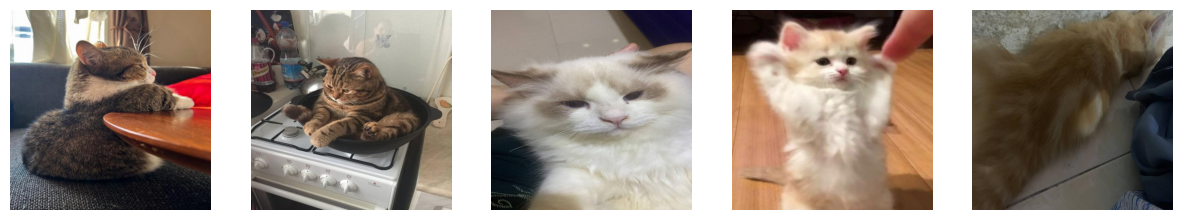


Scabies
Total Image :  250
Resolusi Gambar :  (481, 291, 4)


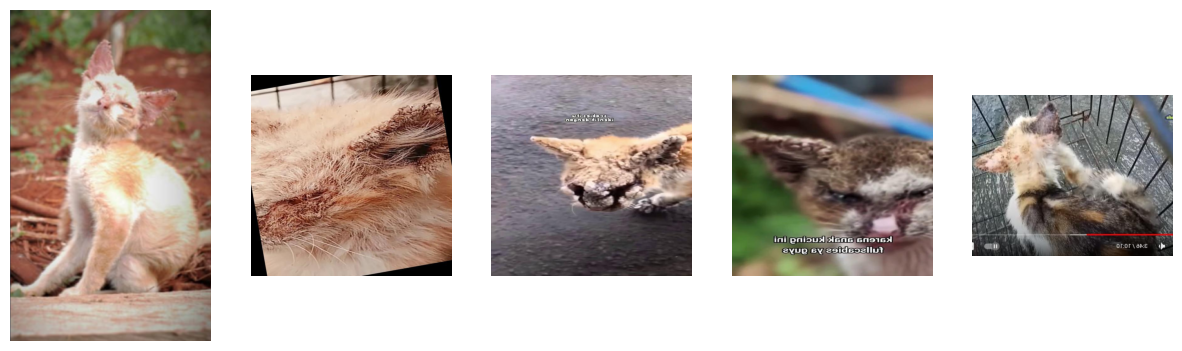


Flea_Allergy
Total Image :  250
Resolusi Gambar :  (150, 200, 3)


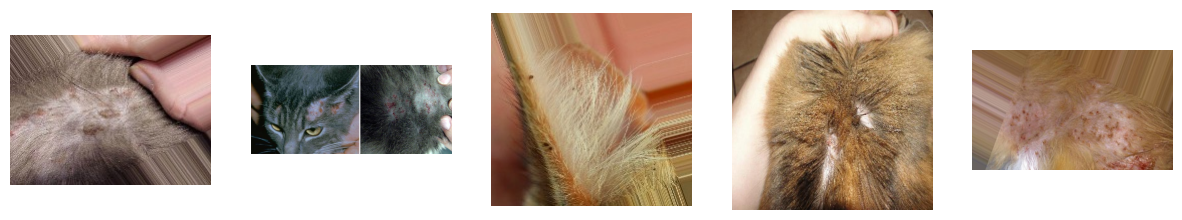


Ringworm
Total Image :  249
Resolusi Gambar :  (640, 640, 3)


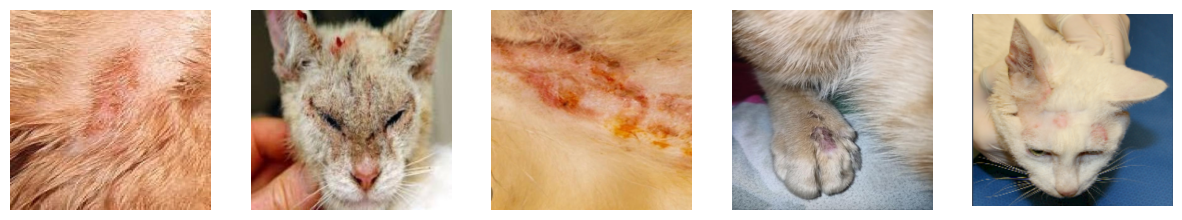

In [ ]:
for item in cat_disease_classes:
    print("")
    print(item)
    class_dir = os.path.join(cat_disease, item)
    class_images = [img for img in os.listdir(class_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

    # Menghitung total image di setiap kelas
    num_images = len(class_images)
    print("Total Image : ", num_images)

    # Menghitung resolusi pada gambar pertama
    img_path = os.path.join(class_dir, class_images[0])
    img = mpimg.imread(img_path)
    image_shape = img.shape
    print("Resolusi Gambar : ", image_shape)

    # Menampilkan beberapa gambar
    plt.figure(figsize=(15, 5))
    for i in range(min(5, len(class_images))):  # Tampilkan maksimum 5 gambar atau sesuai jumlah yang tersedia
        sp = plt.subplot(1, 5, i + 1)
        img = mpimg.imread(os.path.join(class_dir, class_images[i]))
        plt.axis('off')
        plt.imshow(img)
    plt.show()


# PREPOCESING DATA


Split data and augmentation

In [ ]:
train_path = "/content/split_data/train"
test_path = "/content/split_data/validation"


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

training_dataset = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode= 'rgb'
)

validation_dataset = validation_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode= 'rgb'
)

bred_dict = training_dataset.class_indices
print(bred_dict)




Found 799 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
{'Flea_Allergy': 0, 'Health': 1, 'Ringworm': 2, 'Scabies': 3}


In [ ]:
x_train, y_train = next(training_dataset)
x_val, y_val = next(validation_dataset)

In [ ]:
x_train.shape

(64, 224, 224, 3)

In [ ]:
class_Dict = {v : k for k, v in bred_dict.items()}

def plot__images(x, y):
  labels = np.argmax(y,axis=1)
  labels = [class_Dict[label] for label in labels]

  for idx in range(0,10):
    plt.figure(figsize=(5,5))
    plt.imshow(x[idx])
    plt.title(labels[idx])

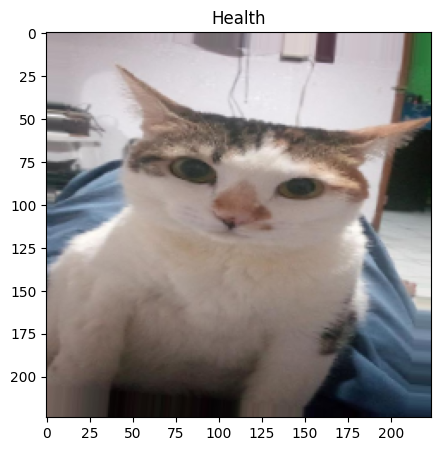

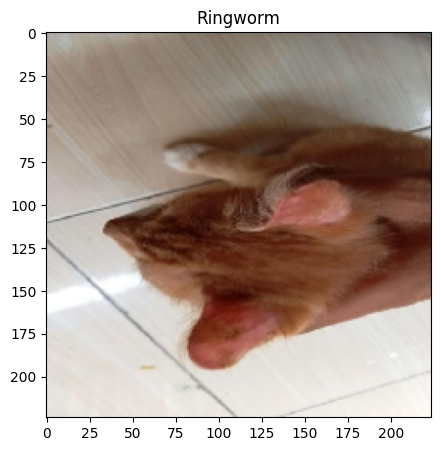

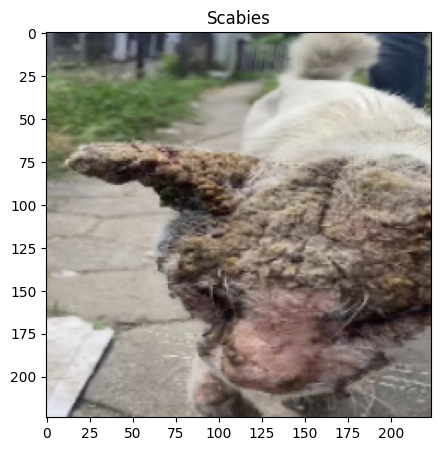

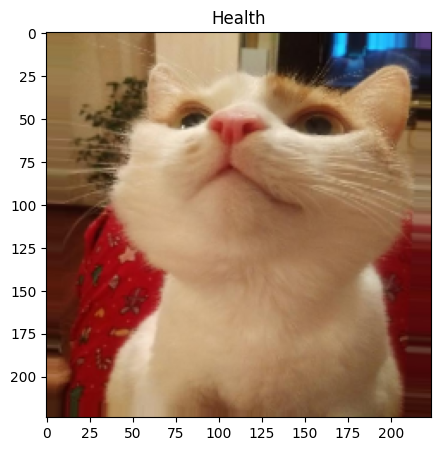

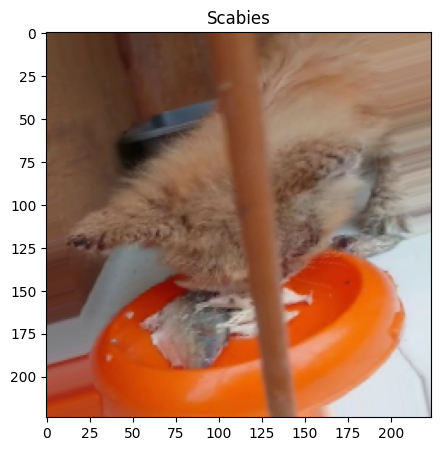

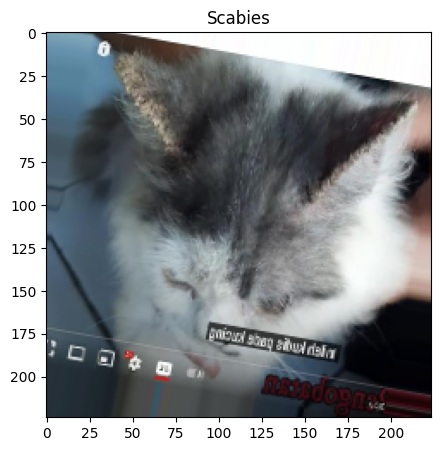

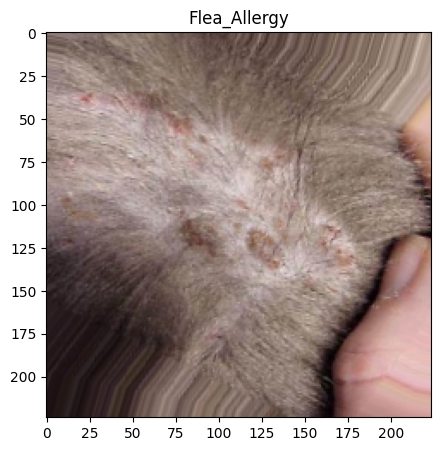

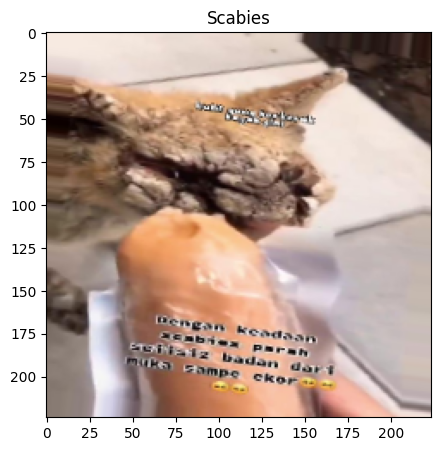

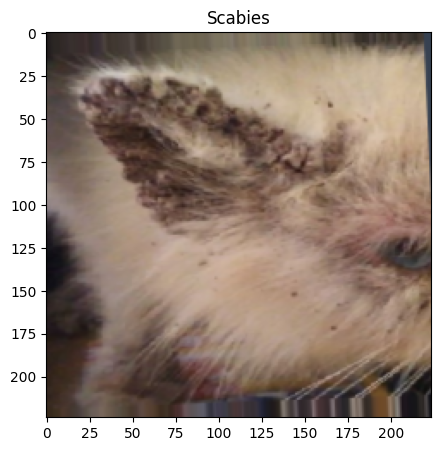

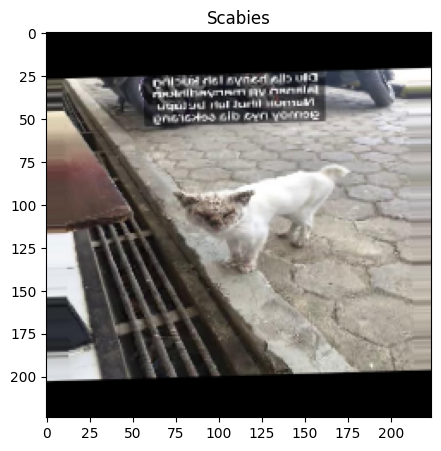

In [ ]:
plot__images(x_train, y_train)

In [ ]:
validation_dataset.class_indices

{'Flea_Allergy': 0, 'Health': 1, 'Ringworm': 2, 'Scabies': 3}

# MODELING

In [ ]:
base_model = MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights="imagenet"
    )

for layer in base_model.layers:
    layer.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(4, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,917,956 (11.13 MB)

 Trainable params: 658,948 (2.51 MB)

 Non-trainable params: 2,259,008 (8.62 MB)

In [ ]:
model.compile(
      optimizer=Adam(learning_rate=0.0001),
      loss="categorical_crossentropy",
      metrics=["accuracy"]
)

Buat fungsi callback

In [ ]:
class early_stopping_callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if logs.get('accuracy')>=0.9 and logs.get('val_accuracy')>=0.9:
      print("\nReached 90% train accuracy and 90% accuracy so cancelling training!")
      self.model.stop_training = True

Mulai train model

In [ ]:
history = model.fit(
    training_dataset,
    validation_data=validation_dataset,
    epochs=25,
    verbose=2,
    callbacks=[early_stopping_callback()]
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 - 39s - 3s/step - accuracy: 0.3955 - loss: 1.7422 - val_accuracy: 0.6050 - val_loss: 0.8969
Epoch 2/25
13/13 - 18s - 1s/step - accuracy: 0.6446 - loss: 0.9120 - val_accuracy: 0.7050 - val_loss: 0.7110
Epoch 3/25
13/13 - 12s - 951ms/step - accuracy: 0.7635 - loss: 0.6496 - val_accuracy: 0.7450 - val_loss: 0.6137
Epoch 4/25
13/13 - 21s - 2s/step - accuracy: 0.7960 - loss: 0.5800 - val_accuracy: 0.8000 - val_loss: 0.5448
Epoch 5/25
13/13 - 12s - 937ms/step - accuracy: 0.8023 - loss: 0.5108 - val_accuracy: 0.8300 - val_loss: 0.4954
Epoch 6/25
13/13 - 12s - 938ms/step - accuracy: 0.8398 - loss: 0.4327 - val_accuracy: 0.8500 - val_loss: 0.4653
Epoch 7/25
13/13 - 20s - 2s/step - accuracy: 0.8548 - loss: 0.4157 - val_accuracy: 0.8450 - val_loss: 0.4520
Epoch 8/25
13/13 - 12s - 933ms/step - accuracy: 0.8623 - loss: 0.3663 - val_accuracy: 0.8600 - val_loss: 0.4280
Epoch 9/25
13/13 - 12s - 919ms/step - accuracy: 0.8874 - loss: 0.3158 - val_accuracy: 0.8650 - val_loss: 0.4172
Epoch 10/25
13/

# Hasil Model

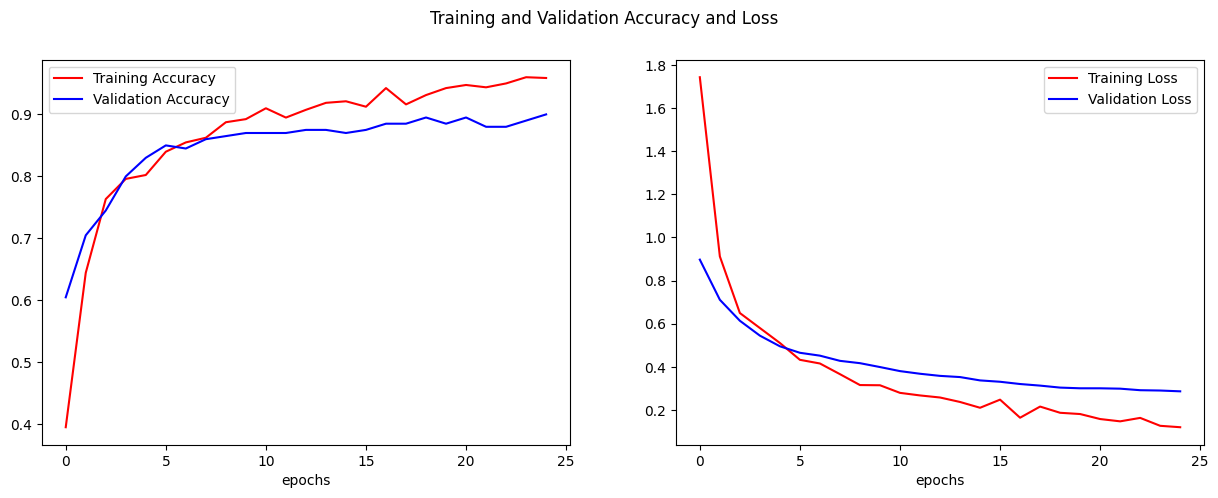

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Training and Validation Accuracy and Loss')

# Define data and labels for each subplot
data_labels = [
    (acc, val_acc, 'Accuracy'),
    (loss, val_loss, 'Loss')
]

# Iterate through subplots and data
for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    axs[i].plot(epochs_range, data[0], 'r', label="Training " + label)
    axs[i].plot(epochs_range, data[1], 'b', label="Validation " + label)
    axs[i].legend()
    axs[i].set_xlabel('epochs')

plt.show()

# SAVE MODEL

In [ ]:
saved_model_path = "./my_model.h5"

# YOUR CODE HERE
model.save(saved_model_path)

In [ ]:

# Load model
loaded_model = load_model('/content/my_model.h5')

# Cek struktur model yang dimuat
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,917,958 (11.13 MB)

 Trainable params: 658,948 (2.51 MB)

 Non-trainable params: 2,259,008 (8.62 MB)

 Optimizer params: 2 (12.00 B)